# EDA - Analisis exploratorio de datos

- Analisis de dataset originales
- Preprocesamiento
    - Limpieza de dataset
    - Armado de datasets para entrenamiento
        - Muestras totales (unitarias, por segundo y por minuto)
        - Muestras por especimen (unitarias, por segundo y por minuto)
- Analisis de datasets resultantes

In [61]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

Dependiendo del kernel de python que estemos usando, esta bueno chequear si estamos corriendo en la maquina local, el contenedor de docker con jupyter u otro server remoto. 

In [62]:
!whoami
!pwd

jbaez


/home/jbaez/repos/gintea/rnr-meleros/notebooks


Si estamos corriendo con el contenedor que se crea con este repo, tenemos que movernos a la ubicación del repo, en este caso usando el comando magico %cd.

In [63]:
%cd meleros/notebooks/

[Errno 2] No such file or directory: 'meleros/notebooks/'
/home/jbaez/repos/gintea/rnr-meleros/notebooks


/home/jbaez/.local/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


## Lectura de datasets originales

Partimos de 2 datasets originales, primero vamos a revisar la forma de ambos programaticamente:
- Head: primeras lineas
- Shape: Tamaño del dataframe

In [64]:
dataset1_path = "../data/0-cruda/estudio3.csv"
dataset1_crudo_dataframe = pd.read_csv(dataset1_path)

dataset2_path = "../data/0-cruda/tabla-resumen.csv"
dataset2_crudo_dataframe = pd.read_csv(dataset2_path)


In [65]:
dataset1_crudo_dataframe.head()

,UE,Nombre,Sexo,Etapa,Hora,Tiempo,X,Y,Z,Estado,Comportamiento,ODBA
0,6,Matilda,Hembra,A1,20:00.0,1,0.0000,-0.5469,0.8125,I,D,0.014043
1,6,Matilda,Hembra,A1,20:00.1,1,-0.0156,-0.5469,0.8281,I,D,0.020277
2,6,Matilda,Hembra,A1,20:00.2,1,0.0000,-0.5469,0.7969,I,D,0.029643
3,6,Matilda,Hembra,A1,20:00.3,1,-0.0156,-0.5469,0.8125,I,D,0.011963
4,6,Matilda,Hembra,A1,20:00.4,1,0.0000,-0.5469,0.8125,I,D,0.014043


In [66]:
dataset2_crudo_dataframe.head()

,UE,Nombre,Sexo,Fecha,Hora,Estado,Comportamiento,Comport 2,Posición,x,...,x prom/3seg,y prom/3seg,z prom/3seg,dif x,dif y,dif z,abs dif x,abs dif y,abs dif z,ODBA
0,1,Chaqueña,Hembra,8/22/2019,25:28.0,A,E,E,C,0.1250,...,0.117717,0.1948,0.914077,0.007283,0.0708,-0.023477,0.007283,0.0708,0.023477,0.101560
1,1,Chaqueña,Hembra,8/22/2019,25:28.1,A,E,E,C,0.1094,...,NaN,NaN,NaN,-0.008317,0.0708,-0.039077,0.008317,0.0708,0.039077,0.118193
2,1,Chaqueña,Hembra,8/22/2019,25:28.2,A,E,E,C,0.1094,...,NaN,NaN,NaN,-0.008317,0.0708,-0.007777,0.008317,0.0708,0.007777,0.086893
3,1,Chaqueña,Hembra,8/22/2019,25:28.3,A,E,E,C,0.1094,...,NaN,NaN,NaN,-0.008317,0.0552,0.007823,0.008317,0.0552,0.007823,0.071340
4,1,Chaqueña,Hembra,8/22/2019,25:28.4,A,E,E,C,0.1719,...,NaN,NaN,NaN,0.054183,0.0396,0.007823,0.054183,0.0396,0.007823,0.101607


In [67]:
# Revisar nombres de columnas
dataset1_crudo_dataframe.columns.to_list()

['UE',
 'Nombre',
 'Sexo',
 'Etapa',
 'Hora',
 'Tiempo',
 'X',
 'Y',
 'Z',
 'Estado',
 'Comportamiento',
 'ODBA']

In [68]:
dataset2_crudo_dataframe.columns.to_list()

['UE',
 'Nombre',
 'Sexo',
 'Fecha',
 'Hora',
 'Estado',
 'Comportamiento',
 'Comport 2',
 'Posición',
 'x',
 'y',
 'z',
 'x prom/3seg',
 'y prom/3seg',
 'z prom/3seg',
 'dif x',
 'dif y ',
 'dif z',
 'abs dif x',
 'abs dif y ',
 'abs dif z ',
 'ODBA']

In [69]:
dataset1_crudo_dataframe.shape


(466560, 12)

In [70]:
dataset2_crudo_dataframe.shape

(119030, 22)

In [71]:
dataset1_crudo_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466560 entries, 0 to 466559
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UE              466560 non-null  int64  
 1   Nombre          466560 non-null  object 
 2   Sexo            466560 non-null  object 
 3   Etapa           466560 non-null  object 
 4   Hora            466560 non-null  object 
 5   Tiempo          466560 non-null  int64  
 6   X               466560 non-null  float64
 7   Y               466560 non-null  float64
 8   Z               466560 non-null  float64
 9   Estado          466559 non-null  object 
 10  Comportamiento  466559 non-null  object 
 11  ODBA            466560 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 42.7+ MB


In [72]:
dataset2_crudo_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119030 entries, 0 to 119029
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UE              119030 non-null  int64  
 1   Nombre          119030 non-null  object 
 2   Sexo            119030 non-null  object 
 3   Fecha           119030 non-null  object 
 4   Hora            119030 non-null  object 
 5   Estado          119030 non-null  object 
 6   Comportamiento  119020 non-null  object 
 7   Comport 2       119020 non-null  object 
 8   Posición        119030 non-null  object 
 9   x               119030 non-null  float64
 10  y               119030 non-null  float64
 11  z               119030 non-null  float64
 12  x prom/3seg     3968 non-null    float64
 13  y prom/3seg     3968 non-null    float64
 14  z prom/3seg     3968 non-null    float64
 15  dif x           119030 non-null  float64
 16  dif y           119030 non-null  float64
 17  dif z     

In [73]:
dataset1_crudo_dataframe.describe()

,UE,Tiempo,X,Y,Z,ODBA
count,466560.00000,466560.000000,466560.000000,466560.000000,466560.000000,466560.000000
mean,5.50000,144.500000,0.205897,-0.197764,0.540138,0.076477
std,2.81366,83.138027,0.307815,0.502086,0.494675,0.136346
min,2.00000,1.000000,-1.500000,-2.875000,-3.468800,0.000047
25%,3.00000,72.750000,0.015600,-0.593800,0.359400,0.017673
50%,5.00000,144.500000,0.234400,-0.203100,0.750000,0.027037
75%,8.00000,216.250000,0.390600,0.140600,0.890600,0.051567
max,10.00000,288.000000,1.750000,1.578100,5.250000,8.062487


In [74]:
dataset2_crudo_dataframe.describe()

,UE,x,y,z,x prom/3seg,y prom/3seg,z prom/3seg,dif x,dif y,dif z,abs dif x,abs dif y,abs dif z,ODBA
count,119030.000000,119030.000000,119030.000000,119030.000000,3968.000000,3968.000000,3968.000000,1.190300e+05,1.190300e+05,1.190300e+05,119030.000000,119030.000000,119030.000000,119030.000000
mean,5.502310,0.278723,-0.023097,0.669473,0.278663,-0.023176,0.669728,1.097118e-18,2.355132e-19,1.271771e-18,0.064500,0.076805,0.063634,0.204939
std,2.904318,0.422830,0.336086,0.348745,0.408476,0.313718,0.330369,1.096109e-01,1.209401e-01,1.129497e-01,0.088624,0.093421,0.093319,0.216879
min,1.000000,-2.000000,-2.125000,-7.296900,-0.994280,-1.018233,-0.691680,-1.748943e+00,-2.248437e+00,-8.158363e+00,0.000000,0.000000,0.000000,0.001063
25%,3.000000,0.015600,-0.281300,0.484400,0.040109,-0.268242,0.498581,-3.226667e-02,-4.008667e-02,-3.175667e-02,0.010900,0.012027,0.013053,0.054710
50%,6.000000,0.203100,-0.031300,0.812500,0.204443,-0.037527,0.822150,5.200000e-04,0.000000e+00,4.333333e-05,0.031778,0.040120,0.032327,0.135943
75%,8.000000,0.625000,0.218800,0.921900,0.613554,0.212777,0.908344,3.128000e-02,4.014583e-02,3.285333e-02,0.081786,0.108900,0.077103,0.282347
max,10.000000,2.328100,3.234400,5.046900,1.012520,0.945320,1.059917,1.992150e+00,3.110963e+00,3.986983e+00,1.992150,3.110963,8.158363,12.413090


In [75]:
# Chequear valores nulos dataset 1
dataset1_crudo_dataframe.isnull().sum()

UE                0
Nombre            0
Sexo              0
Etapa             0
Hora              0
Tiempo            0
X                 0
Y                 0
Z                 0
Estado            1
Comportamiento    1
ODBA              0
dtype: int64

In [76]:
# Chequear valores nulos dataset 2
dataset2_crudo_dataframe.isnull().sum()

UE                     0
Nombre                 0
Sexo                   0
Fecha                  0
Hora                   0
Estado                 0
Comportamiento        10
Comport 2             10
Posición               0
x                      0
y                      0
z                      0
x prom/3seg       115062
y prom/3seg       115062
z prom/3seg       115062
dif x                  0
dif y                  0
dif z                  0
abs dif x              0
abs dif y              0
abs dif z              0
ODBA                   0
dtype: int64

In [77]:
# Chequear valores unicos dataset 1
dataset1_crudo_dataframe.nunique()

UE                     6
Nombre                 6
Sexo                   2
Etapa                  3
Hora                1083
Tiempo               288
X                    158
Y                    158
Z                    206
Estado                 2
Comportamiento        12
ODBA              116897
dtype: int64

In [78]:
# Chequear valores unicos dataset 2
dataset2_crudo_dataframe.nunique()

UE                   10
Nombre               11
Sexo                  2
Fecha                 5
Hora              35700
Estado                2
Comportamiento       10
Comport 2             7
Posición              9
x                   151
y                   152
z                   179
x prom/3seg        3368
y prom/3seg        3444
z prom/3seg        2830
dif x             25492
dif y             28505
dif z             24145
abs dif x         18447
abs dif y         20023
abs dif z         18152
ODBA              57669
dtype: int64

### Notas

#### Dataset 1 - estudio3

- Pareciera ser el original crudo
- Mas muestras: (466560, 12)
- Menos columnas
    - Datos de interes: Nombre, Sexo, X, Y, Z,  Comportamiento (salida) y ODBA.
    - 12 tipos de comportamiento de salida

#### Dataset 2 - tabla-resumen

- Pareciera ser el dataset curado para el estudio con excel
- Menos muestras: (119030, 22)
- Mas columnas
    - Tiene un segundo comportamiento y promedios de los últimos 3 segundos de las lecturas del acelerometro. 
    - 10 tipos de comportamientos de salida

A priori pareciera ser que el dataset 1 es el mejor para representado. Para verificar, se revisan las columnas de salida y el numero de especímenes y muestras de ambos datasets.

In [79]:
# Verificar valores de la columna Comportamiento para ambos datasets
dataset1_crudo_dataframe['Comportamiento'].unique().tolist()

['D', 'E', 'AL', 'O', 'IM', 'AA', 'NV', 'L', 'LD', 'LA', 'LI', 'LR', nan]

In [80]:
dataset2_crudo_dataframe['Comportamiento'].unique().tolist()

['E', 'TD', 'IM', 'L', 'AA', 'TA', nan, 'OTROS', 'I', 'AL', 'A']

In [81]:
dataset1_crudo_dataframe['Nombre'].unique().tolist()

['Matilda', 'Maíz', 'Franco', 'Isabella', 'Garrita', 'Salvaje']

In [82]:
dataset2_crudo_dataframe['Nombre'].unique().tolist()

['Chaqueña',
 'Franco',
 'Garrita',
 'Inti',
 'Inti ',
 'Isabella',
 'Luz',
 'Maíz',
 'Matilda',
 'Salvaje',
 'Tucumano']

In [83]:
# Revisar si la columna inti repetida tiene los mismos datos

dataframe_inti = dataset2_crudo_dataframe[dataset2_crudo_dataframe['Nombre']=='Inti']
dataframe_inti_ = dataset2_crudo_dataframe[dataset2_crudo_dataframe['Nombre']=='Inti ']

# Borrar columna nombre de ambos dataframes
dataframe_inti = dataframe_inti.drop(columns=['Nombre'])
dataframe_inti_ = dataframe_inti_.drop(columns=['Nombre'])

# Comparar ambos dataframes
print(dataframe_inti.equals(dataframe_inti_))

False


In [84]:
# Numero de muestras por nombre en dataset 1
dataset1_crudo_dataframe['Nombre'].value_counts()

Nombre
Matilda     77760
Maíz        77760
Franco      77760
Isabella    77760
Garrita     77760
Salvaje     77760
Name: count, dtype: int64

In [85]:
dataset2_crudo_dataframe['Nombre'].value_counts()

Nombre
Chaqueña    14600
Luz         13920
Maíz        13040
Matilda     12400
Franco      12270
Tucumano    11830
Salvaje     11650
Garrita     10650
Inti         6540
Inti         6540
Isabella     5590
Name: count, dtype: int64

## Analisis detallado

### Datos categóricos

#### Graficos
- Muestras por especimen
- Muestras por sexo
- Muestras por comportamiento
- Muestras por especimen por comportamiento

Text(0.5, 1.0, 'Dataset 2 - tabla-resumen.csv')

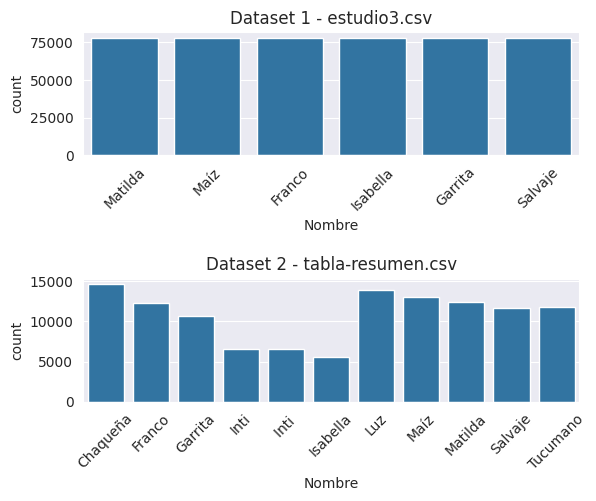

In [86]:
# Count plot of the column Name in dataset 1 an 2
fig, axes = plt.subplots(2, 1)

sns.countplot(x='Nombre', data=dataset1_crudo_dataframe, ax=axes[0])
sns.countplot(x='Nombre', data=dataset2_crudo_dataframe, ax=axes[1])

# Adjust vertical spacing between the plots
plt.subplots_adjust(hspace=1)

# Rotate x-axis labels
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

# Set the title for the plots
axes[0].set_title('Dataset 1 - estudio3.csv')
axes[1].set_title('Dataset 2 - tabla-resumen.csv')


Se vuelve a apreciar visualmente que el dataset 1 parece estar mas crudo que el dataset 2. Se procede a comparar los numeros de muestras para los especímenes que coinciden en ambos datasets.

<Axes: xlabel='Nombre', ylabel='count'>

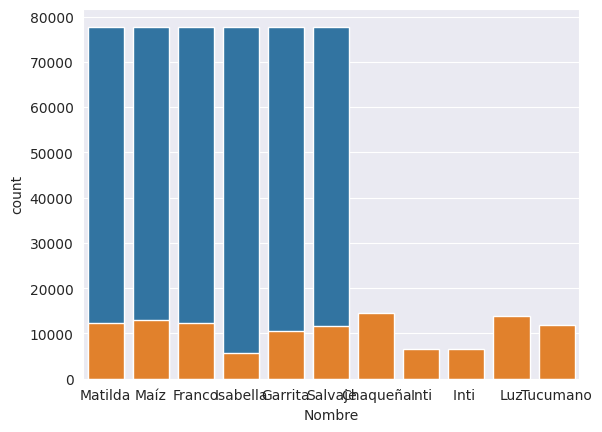

In [87]:
# Plot counts for each specimen in dataset 1 and compare with dataset 2
sns.countplot(x='Nombre', data=dataset1_crudo_dataframe)
sns.countplot(x='Nombre', data=dataset2_crudo_dataframe)



<Axes: xlabel='Sexo', ylabel='count'>

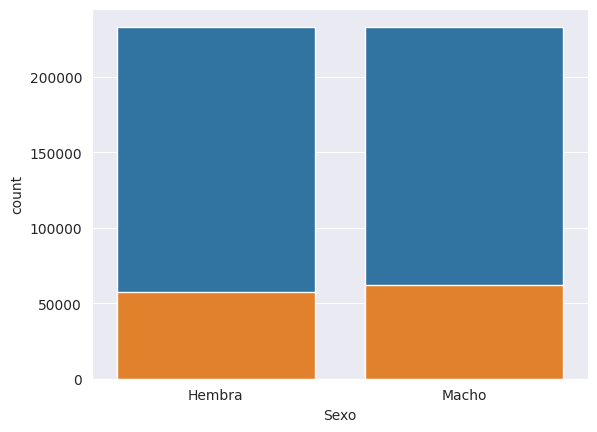

In [88]:
# Plot de muestras por sexo
sns.countplot(x='Sexo', data=dataset1_crudo_dataframe)
sns.countplot(x='Sexo', data=dataset2_crudo_dataframe)


In [89]:
dataset1_crudo_dataframe['Sexo'].value_counts()

Sexo
Hembra    233280
Macho     233280
Name: count, dtype: int64

In [90]:
dataset2_crudo_dataframe['Sexo'].value_counts()

Sexo
Macho     61870
Hembra    57160
Name: count, dtype: int64

Text(0.5, 1.0, 'Dataset 2 - tabla-resumen.csv')

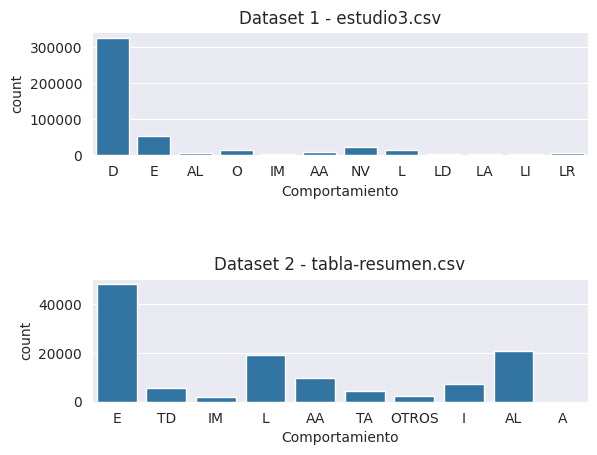

In [91]:
# Count plot of the column Name in dataset 1 an 2
fig, axes = plt.subplots(2, 1)

sns.countplot(x='Comportamiento', data=dataset1_crudo_dataframe, ax=axes[0])
sns.countplot(x='Comportamiento', data=dataset2_crudo_dataframe, ax=axes[1])

# Adjust vertical spacing between the plots
plt.subplots_adjust(hspace=1)

# Set the title for the plots
axes[0].set_title('Dataset 1 - estudio3.csv')
axes[1].set_title('Dataset 2 - tabla-resumen.csv')


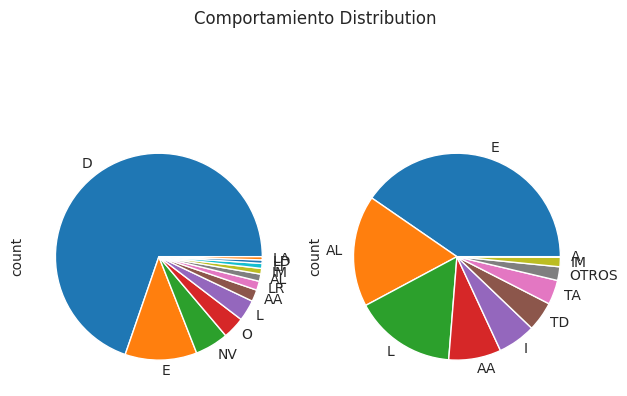

In [92]:
# Create a pie chart for dataset 1
plt.subplot(1, 2, 1)
dataset1_crudo_dataframe['Comportamiento'].value_counts().plot.pie()

# Create a pie chart for dataset 2
plt.subplot(1, 2, 2)
dataset2_crudo_dataframe['Comportamiento'].value_counts().plot.pie()

# Set the title for the plots
plt.suptitle('Comportamiento Distribution')

# Adjust the layout
plt.tight_layout()


<Axes: xlabel='Comportamiento', ylabel='count'>

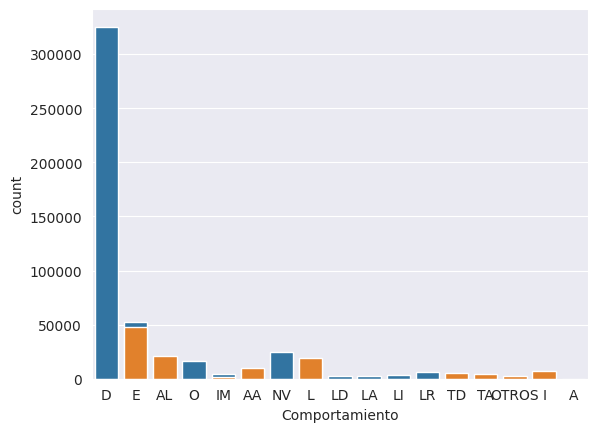

In [93]:
# Plot counts for each specimen in dataset 1 and compare with dataset 2
sns.countplot(x='Comportamiento', data=dataset1_crudo_dataframe)
sns.countplot(x='Comportamiento', data=dataset2_crudo_dataframe)

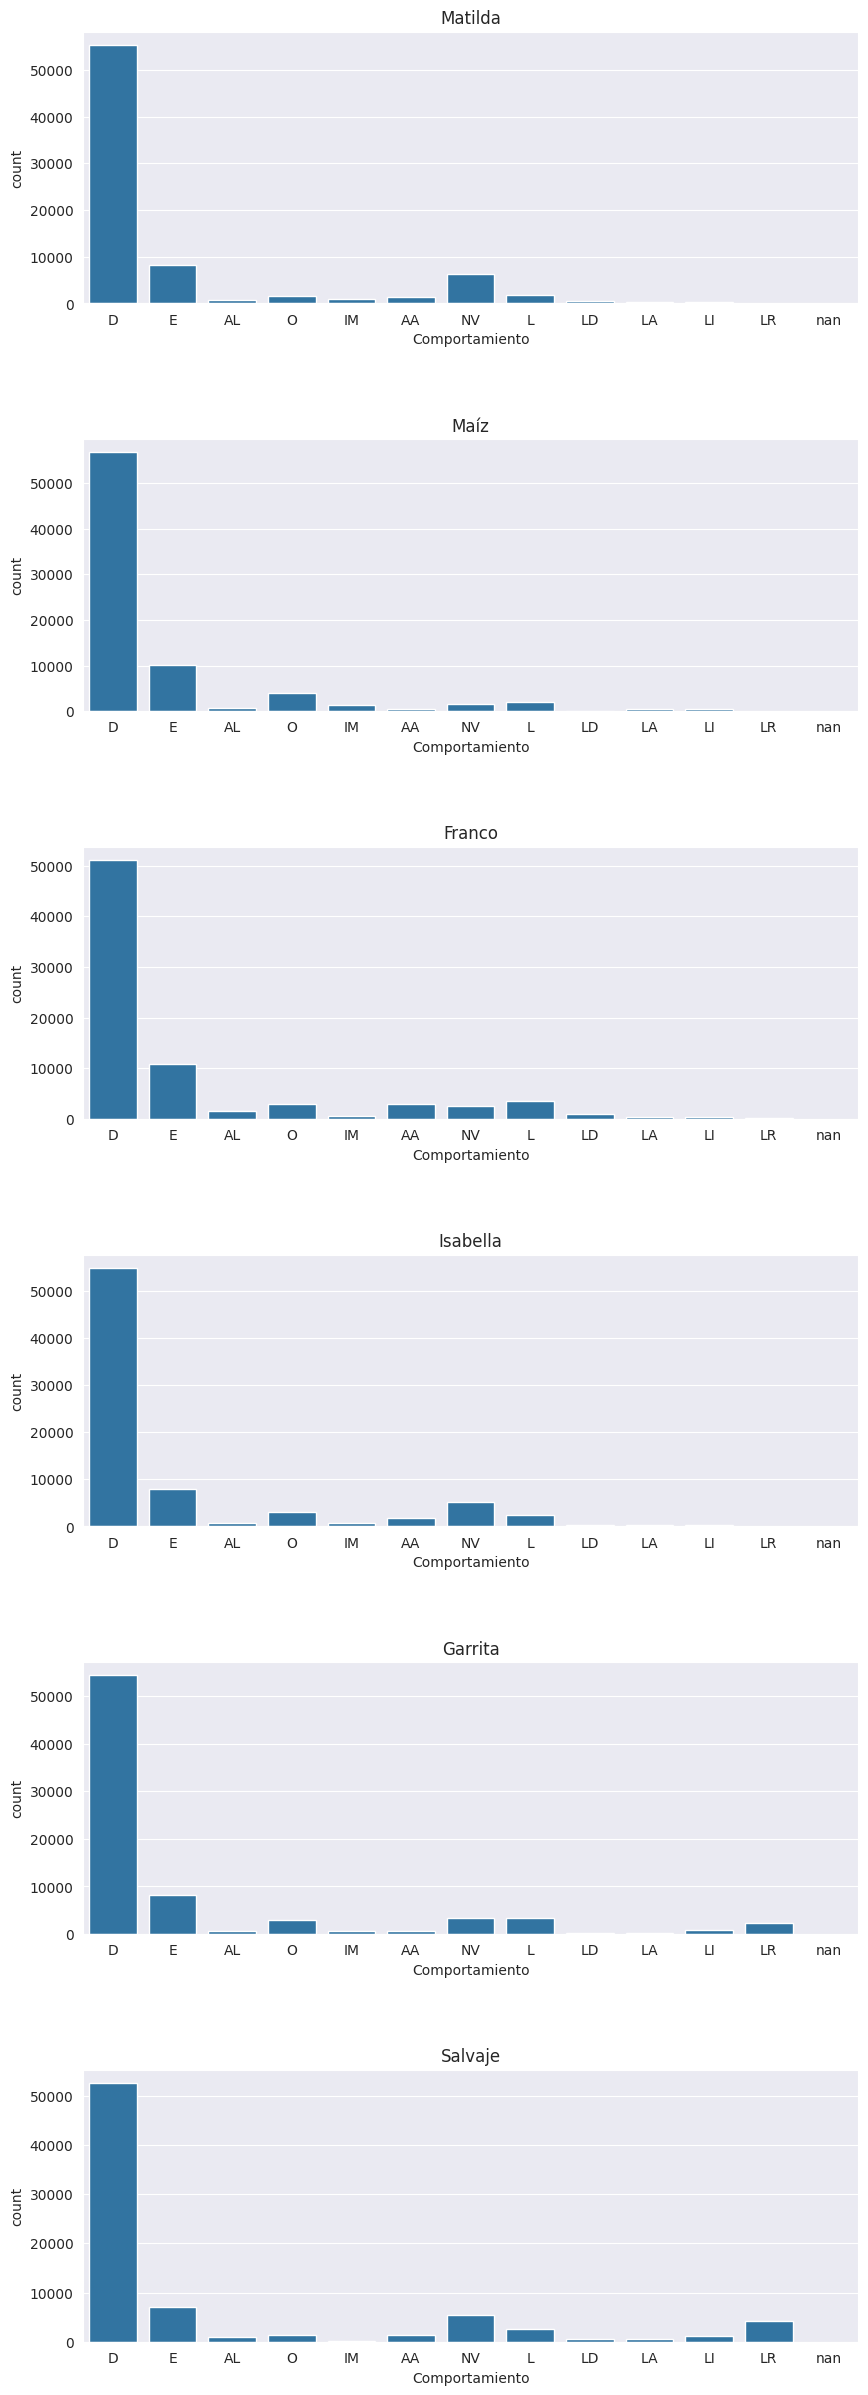

In [94]:
# Distribución de comportamientos por especimen: Dataset 1
nombres = dataset1_crudo_dataframe['Nombre'].unique().tolist()

fig, axes = plt.subplots(len(nombres), 1, figsize=(10, len(nombres)*5))

plt.subplots_adjust(hspace=0.5)

comportamiento_order = dataset1_crudo_dataframe['Comportamiento'].unique().tolist()

for i, nombre in enumerate(nombres):
    sns.countplot(x='Comportamiento', data=dataset1_crudo_dataframe[dataset1_crudo_dataframe['Nombre']==nombre], ax=axes[i], order=comportamiento_order)
    axes[i].set_title(nombre)

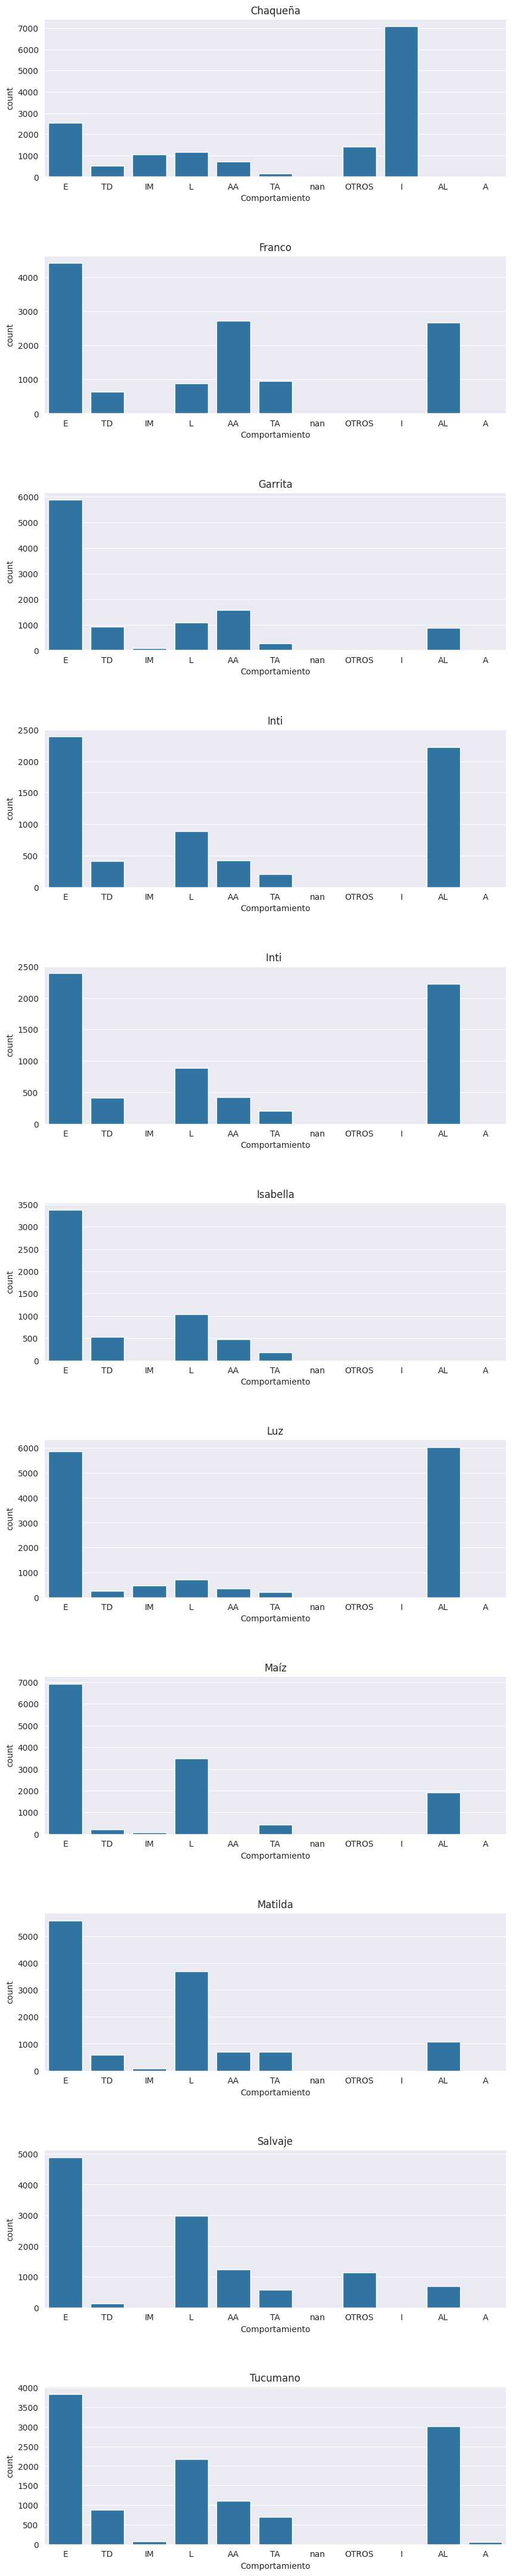

In [95]:
# Distribución de comportamientos por especimen: Dataset 1
nombres = dataset2_crudo_dataframe['Nombre'].unique().tolist()

fig, axes = plt.subplots(len(nombres), 1, figsize=(10, len(nombres)*5))

plt.subplots_adjust(hspace=0.5)

comportamiento_order = dataset2_crudo_dataframe['Comportamiento'].unique().tolist()

for i, nombre in enumerate(nombres):
    sns.countplot(x='Comportamiento', data=dataset2_crudo_dataframe[dataset2_crudo_dataframe['Nombre']==nombre], ax=axes[i], order=comportamiento_order)
    axes[i].set_title(nombre)

#### Conclusiones

- Especimenes
    - Dataset 1 muestra datos repartidos igualmente entre menor cantidad de especímenes
    - Dataset 2 muestra mas especímenes, pero con numero de muestras variable, entre las 5590 y los 14050 dependiendo el especímen.

- Sexo: El dataset esta bastante equilibrado en ambos casos.

- Comportamiento: Es la variable de estudio mas importante, salida cuya clasificación queremos que predizcan nuestros modelos. Es evidente que en cuanto a muestras por comportamiento todo el dataset esta desequilibrado.
    - El dataset 1 contiene una cantidad desproporcionada de muestras con los especímenes en descanso. 
    - En el caso del dataset 2, el comportamiento dominantes es E, de exploración, que indica que el animal esta despierto, alerta y con un cierto nivel de actividad.


### Datos numéricos

Los datos numéricos de entrada para nuestros modelos seran las variables X, Y, Z y ODBA. Se procede al análisis exploratorio de las variables relevantes en los formatos:

- Univariable
    - Kernel plot por variable numérica: Sesgos
    - Box plot por variable numérica: Rangos comunes
- Box plot por variable num comportamiento por dataset
- Swarm plot de variable numérica vs coportamiento: análisis de outliers
- Violin plot por comportamiento por dataset 

#### Scatter plots

In [ ]:
# Count
fig, axes = plt.subplots(2, 2, figsize=(10, 20))

sns.scatterplot(x='X', y=)


#### Violin plots

Text(0.5, 1.0, 'Dataset 1 - Valores de ODBA por Comportamiento')

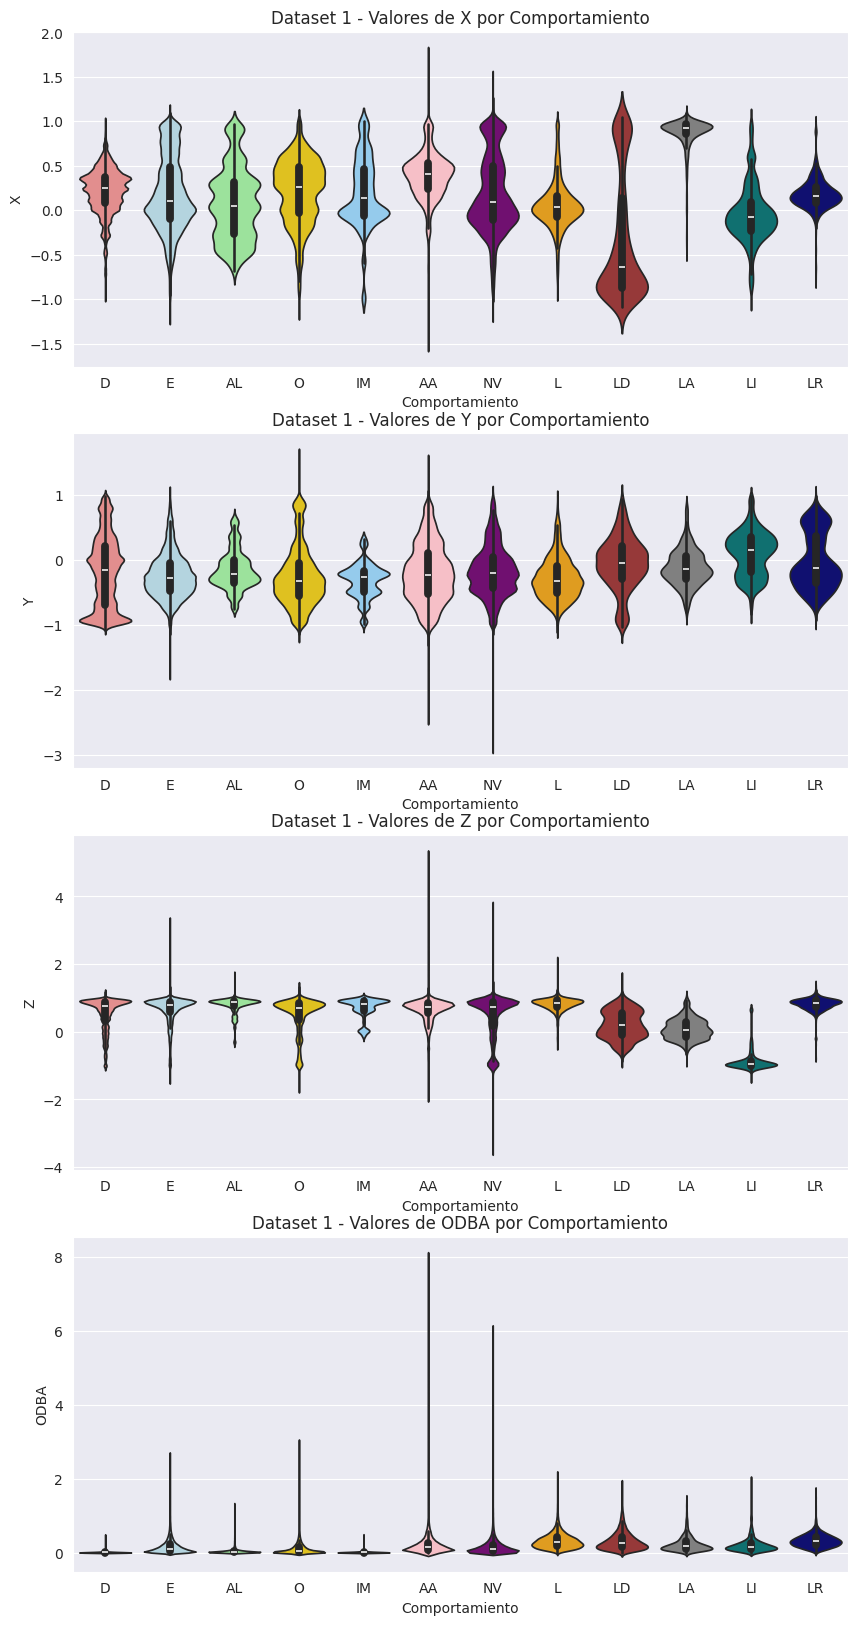

In [96]:
# Count plot of the column Name in dataset 1
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

# 'D', 'E', 'AL', 'O', 'IM', 'AA', 'NV', 'L', 'LD', 'LA', 'LI', 'LR'

sns.violinplot(x='Comportamiento',
                y='X', 
                hue='Comportamiento',
                data=dataset1_crudo_dataframe,
                palette={ 'D': 'lightcoral', 'E': 'lightblue', 'AL': 'lightgreen', 'O': 'gold', 'IM': 'lightskyblue', 'AA': 'lightpink', 'NV':'purple', 'L':'orange', 'LD':'brown', 'LA':'gray', 'LI':'teal', 'LR':'navy'},
                ax=axes[0],
                legend=False
                )

sns.violinplot(x='Comportamiento',
                y='Y', 
                hue='Comportamiento',
                data=dataset1_crudo_dataframe,
                palette={ 'D': 'lightcoral', 'E': 'lightblue', 'AL': 'lightgreen', 'O': 'gold', 'IM': 'lightskyblue', 'AA': 'lightpink', 'NV':'purple', 'L':'orange', 'LD':'brown', 'LA':'gray', 'LI':'teal', 'LR':'navy'},
                ax=axes[1],
                legend=False
                )

sns.violinplot(x='Comportamiento',
                y='Z', 
                hue='Comportamiento',
                data=dataset1_crudo_dataframe,
                palette={ 'D': 'lightcoral', 'E': 'lightblue', 'AL': 'lightgreen', 'O': 'gold', 'IM': 'lightskyblue', 'AA': 'lightpink', 'NV':'purple', 'L':'orange', 'LD':'brown', 'LA':'gray', 'LI':'teal', 'LR':'navy'},
                ax=axes[2],
                legend=False
                )

sns.violinplot(x='Comportamiento',
                y='ODBA', 
                hue='Comportamiento',
                data=dataset1_crudo_dataframe,
                palette={ 'D': 'lightcoral', 'E': 'lightblue', 'AL': 'lightgreen', 'O': 'gold', 'IM': 'lightskyblue', 'AA': 'lightpink', 'NV':'purple', 'L':'orange', 'LD':'brown', 'LA':'gray', 'LI':'teal', 'LR':'navy'},
                ax=axes[3],
                legend=False
                )

# Adjust vertical spacing between the plots
# plt.subplots_adjust(hspace=1)

# Set the title for the plots
axes[0].set_title('Dataset 1 - Valores de X por Comportamiento')
axes[1].set_title('Dataset 1 - Valores de Y por Comportamiento')
axes[2].set_title('Dataset 1 - Valores de Z por Comportamiento')
axes[3].set_title('Dataset 1 - Valores de ODBA por Comportamiento')
